<a href="https://colab.research.google.com/github/Harshal1618/MLBasics/blob/master/KMean_K%3D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create 3 clustres of randomized data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

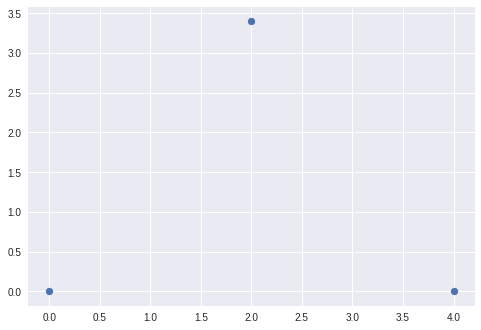

In [0]:
p1 = (0,0)
p2 = (4,0)
p3 = (2,3.4)

l = [p1,p2,p3] 
l_x = [e[0] for e in l]
l_y = [e[1] for e in l]

plt.scatter(l_x, l_y)

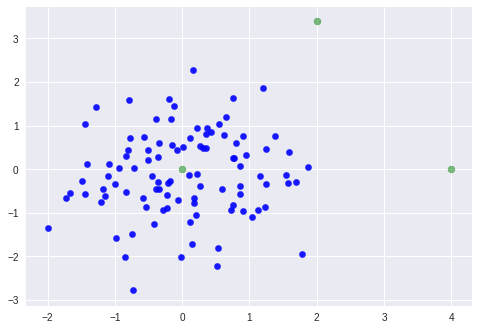

In [0]:

l_dist1_x = np.random.normal(loc = l_x[0], scale = 1.0, size = 100)
l_dist1_y = np.random.normal(loc = l_y[0], scale = 1.0, size = 100)

plt.scatter(l_x, l_y, 50, 'g', alpha = 0.5)
plt.scatter(l_dist1_x, l_dist1_y, 40, 'b', alpha = 0.9)

In [0]:
l_pt_x = []
l_pt_y = []


for i in range(len(l)):
  x_dist = list(np.random.normal(loc = l[i][0], scale = 1.0, size = 50))
  y_dist = list(np.random.normal(loc = l[i][1], scale = 1.0, size = 50))
  
  l_pt_x = l_pt_x + x_dist
  l_pt_y = l_pt_y + y_dist

In [0]:
# Find distance of each point from current mean
df = pd.DataFrame({'iteration':0,'pt_x': l_pt_x , 'pt_y': l_pt_y, 'dist0':0, 'dist1':0, 'dist2':0, 'closest':0})

In [0]:
# Define number of means
k = 3

# select random elements
l_random_mean = np.random.randint(0,len(l_pt_x),k)

# Current means
l_curr_mean = []

# plot random means
for i in range(k):
  l_curr_mean.append([l_pt_x[l_random_mean[i]], l_pt_y[l_random_mean[i]]])
  
df_mean = pd.DataFrame({'iteration':0, 
                        'k':range(k), 
                        'x_mean': [l[0] for l in l_curr_mean],
                        'y_mean': [l[1] for l in l_curr_mean]
                       })



In [0]:
def distance(p,x,y):
  d = np.sqrt((p[0]-x)**2 + (p[1]- y)**2)
  return d

In [0]:
# no of iterations
iter = 20

for i in range(iter):
  df.loc[df['iteration'] == i, ['dist0']] = df[df['iteration'] == i].apply(lambda row : distance(l_curr_mean[0], row['pt_x'], row['pt_y']), axis = 1)
  df.loc[df['iteration'] == i, ['dist1']] = df[df['iteration'] == i].apply(lambda row : distance(l_curr_mean[1], row['pt_x'], row['pt_y']), axis = 1)
  df.loc[df['iteration'] == i, ['dist2']] = df[df['iteration'] == i].apply(lambda row : distance(l_curr_mean[2], row['pt_x'], row['pt_y']), axis = 1)
  
  df.loc[df['iteration'] == i, ['closest']] = df[df['iteration'] == i].apply(lambda row : np.argmin(list(row[['dist0','dist1','dist2']])), axis = 1)
  
  for j in range(k):
    l_curr_mean[j][0] = df['pt_x'][(df['closest'] == j) & (df['iteration'] == i)].mean()
    l_curr_mean[j][1] = df['pt_y'][(df['closest'] == j) & (df['iteration'] == i)].mean()
    
  df_mean = df_mean.append(pd.DataFrame({'iteration':i+1, 
                        'k':range(k), 
                        'x_mean': [l[0] for l in l_curr_mean],
                        'y_mean': [l[1] for l in l_curr_mean]
                       }))
  
  df = df.append(pd.DataFrame({'iteration':i+1,'pt_x': l_pt_x , 'pt_y': l_pt_y}))

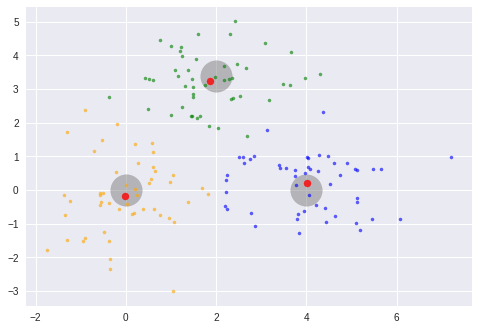

In [0]:
iteration_no = 8
color = ['blue','green','orange']

plt.scatter(l_x, l_y, 1000, 'grey', alpha = 0.5)
for i in range(k):
  plt.scatter(df['pt_x'][(df['iteration'] == iteration_no) & (df['closest'] == i)], 
              df['pt_y'][(df['iteration'] == iteration_no) & (df['closest'] == i)],
              10, color[i], alpha = 0.6)
  plt.scatter(df_mean['x_mean'][(df_mean['iteration'] == iteration_no) & (df_mean['k'] == i)],
              df_mean['y_mean'][(df_mean['iteration'] == iteration_no) & (df_mean['k'] == i)],
              50,'red', alpha = 0.8)